# **tcrdist-based clustering using DBSCAN**

In [1]:
import os
import sys

src_dir = os.path.abspath('../src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

from tcrdist.repertoire import TCRrep
from clusTCR.datasets import vdj_tcrdist_small, vdj_epitopes_small
from clusTCR.clusTCR import Metrics
from sklearn.cluster import DBSCAN

In [42]:
data = vdj_tcrdist_small()
data = data.drop_duplicates()

# Calculate pw distances
tr = TCRrep(cell_df = data,
            organism = 'human',
            chains = ['beta'],
            db_file='alphabeta_gammadelta_db.tsv')

# Pairwise distance matrix
d = tr.pw_cdr3_b_aa

/home/sebastiaan/miniconda3/envs/tcr/lib/python3.6/site-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/home/sebastiaan/miniconda3/envs/tcr/lib/python3.6/site-packages/tcrdist/repertoire.py:752: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [48]:
# Clustering
res = []
for dist in [*range(5,251,5)]:
    print('DBSCAN clustering with eps: %s' % dist)
    clustering = DBSCAN(eps=dist, min_samples=2, n_jobs=-1).fit(d)
    labels = clustering.labels_
    print(labels)
    
    # Evaluation of clustering results
    data_copy = data.copy()
    data_copy['cluster'] = labels
    data_copy = data_copy.rename(columns={'cdr3_b_aa':'CDR3'})
    data_copy = data_copy[data_copy['cluster']!=-1]
    
    epitopes = vdj_epitopes_small()
    metrics = Metrics(data_copy, epitopes, name='tcrdist')
    summ = metrics.summary()
    summ['threshold'] = [dist] * len(summ)
    res.append(summ)
    
res = pd.concat(res)

DBSCAN clustering with eps: 5
[-1 -1 -1 ... -1 29 63]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 10
[-1 -1 -1 ... -1 29 63]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 15
[-1 -1 -1 ... -1 29 63]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 20
[-1 -1 -1 ... -1 31 67]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 25
[-1 -1 -1 ... -1 31 67]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 30
[-1 -1 -1 ... -1 35 71]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 35
[-1 -1 -1 ... -1 38 75]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 40
[-1 -1 -1 ... -1 39 80]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 45
[-1 -1 -1 ... -1 43 84]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 50
[-1 -1 -1 ... -1 45 87]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 55
[-1  0 -1 ... -1 47 92]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 60
[ -1   0  -1 ...  -1  55 107]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 65
[ -1   0  -1 ...  -1  56 115]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 70
[-1  0 -1 ... -1 61 14]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 75
[-1  0 -1 ... -1 72 16]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 80
[-1  0 -1 ... -1 84 18]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 85
[-1  0 -1 ... -1 52 20]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 90
[-1  0  1 ... -1 63 29]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 95
[-1  0  1 ... -1 66 30]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 100
[-1  0  1 ... -1 69 31]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 105
[-1  0  1 ... -1 72 33]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 110
[-1  0  1 ... -1 76 37]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 115
[-1  0  1 ... -1 80 37]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 120
[-1  0  1 ... -1 84 39]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 125
[-1  0  1 ... -1 97 45]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 130
[ -1   0   1 ...  -1 100  47]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 135
[  0   1   2 ...  38 108  47]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 140
[  0   1   2 ...  43 117  52]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 145
[  0   1   2 ...  49 122  60]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 150
[  0   1   2 ...  55 121  68]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 155
[  0   1   2 ...  60 118   5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 160
[  0   1   2 ...  54 111   5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 165
[ 0  1  2 ... 47 96  5]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 170
[ 0  1  1 ... 38 85  4]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 175
[ 0  1  1 ... 31 68  1]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 180
[ 0  0  0 ... 26 58  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 185
[ 0  0  0 ... 17 46  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 190
[ 0  0  0 ... 13 39  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 195
[ 0  0  0 ... 11 33  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 200
[ 0  0  0 ...  0 28  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 205
[ 0  0  0 ...  0 25  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 210
[ 0  0  0 ...  0 22  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 215
[ 0  0  0 ...  0 15  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 220
[ 0  0  0 ...  0 12  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 225
[ 0  0  0 ...  0 11  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 230
[ 0  0  0 ...  0 10  0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 235
[0 0 0 ... 0 8 0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 240
[0 0 0 ... 0 6 0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 245
[0 0 0 ... 0 5 0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


DBSCAN clustering with eps: 250
[0 0 0 ... 0 5 0]


/home/sebastiaan/PhD/Repositories/clusTCR/src/clusTCR/clusTCR.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gt.drop_duplicates(inplace=True)


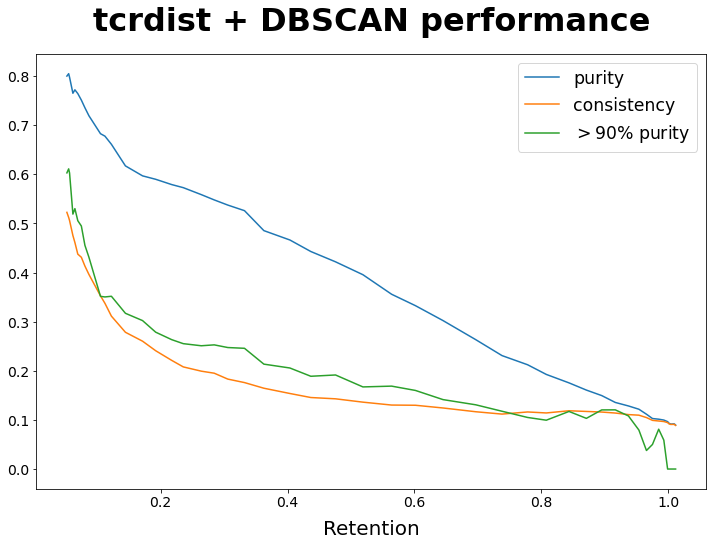

In [58]:
purity = res[res['metrics']=='purity']
purity = purity.actual

purity_90 = res[res['metrics']=='purity_90']
purity_90 = purity_90.actual

retention = res[res['metrics']=='retention']
retention = retention.actual

consistency = res[res['metrics']=='consistency']
consistency = consistency.actual

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(retention, purity, label='purity')
ax.plot(retention, consistency, label='consistency')
ax.plot(retention, purity_90, label='$> 90$% purity')

ax.set_title('tcrdist + DBSCAN performance', fontsize = 32, fontweight = 'bold', y=1.04)
ax.set_xlabel('Retention', fontsize = 20, labelpad = 10)
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.legend(fontsize = 'xx-large')